In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.linear_model

# Sigmoid Activation and Gradient Flow

A step-by-step explanation of forward propagation and backpropagation through a sigmoid activation function.

---

## 1️⃣ Forward Pass: Sigmoid Activation

**Operation**: Input `x` passes through sigmoid activation  
**Formula**:  
$$
\hat{y} = \sigma(x) = \frac{1}{1 + e^{-x}}
$$  
**Properties**:
- Squashes output to range (0, 1)
- Interpretable as probability

---

## 2️⃣ Loss Function: Binary Cross-Entropy

**Purpose**: Measures difference between prediction ($\hat{y}$) and true label ($y$)  
**Formula**:  
$$
L = -\left[y \log(\hat{y}) + (1-y)\log(1-\hat{y})\right]
$$  
**Characteristics**:
- Penalizes confident wrong predictions heavily
- Standard loss for binary classification

---

## 3️⃣ Backpropagation Fundamentals

### Gradient of Loss w.r.t Sigmoid Output
**Key Derivative**:  
$$
\frac{\partial L}{\partial \hat{y}} = \hat{y} - y
$$  
*This represents how much we need to adjust $\hat{y}$ to reduce loss*

---

### Sigmoid Local Gradient
**Derivative of Activation**:  
$$
\frac{d\sigma}{dx} = \sigma(x)(1-\sigma(x)) = \hat{y}(1-\hat{y})
$$  
*Shows the "squashing" effect - maximum gradient when $\hat{y}=0.5$*

---

## 4️⃣ Chain Rule Application

**Final Gradient Calculation**:  
$$
\frac{\partial L}{\partial x} = \underbrace{(\hat{y} - y)}_{\text{Loss gradient}} \cdot \underbrace{\hat{y}(1-\hat{y})}_{\text{Sigmoid gradient}}
$$  

**Visual Chain Rule**:  
$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial \hat{y}} \times \frac{\partial \hat{y}}{\partial x}
$$

---

## Key Insights
- Maximum gradient occurs when $\hat{y}=0.5$ (steepest point of sigmoid)
- Gradient vanishes when $\hat{y}$ approaches 0 or 1 (saturation problem)
- Entire gradient can be computed using only $\hat{y}$ and $y$

# **1. Forward Pass**  
In the forward pass, the input `x` passes through the **sigmoid activation function**, defined as:  

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

The output of the sigmoid function, denoted as `ŷ`, is:  

$$
\hat{y} = \sigma(x)
$$

Since the sigmoid function outputs values in the range \( (0,1) \), `ŷ` represents a probability.

---

# **2. Loss Function**  
For binary classification, we use the **Binary Cross-Entropy Loss**, given by:  

$$
L = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

where:  
- `y` is the true label (`0` or `1`).  
- `ŷ` is the predicted probability.  

This loss penalizes incorrect classifications more when the confidence is high.

---

# **3. Gradient of Loss with Respect to `ŷ`**  
To update parameters during backpropagation, we compute the derivative of the loss with respect to the sigmoid output `ŷ`:

$$
\frac{\partial L}{\partial \hat{y}} = \hat{y} - y
$$

This expression simplifies training since it directly measures the difference between prediction and actual label.

---

# **4. Derivative of Sigmoid Function**  
The sigmoid function’s derivative is useful in backpropagation:

$$
\frac{\partial \sigma(x)}{\partial x} = \sigma(x) \cdot (1 - \sigma(x)) = \hat{y} \cdot (1 - \hat{y})
$$

This derivative shows how the sigmoid output changes with respect to `x`.

---

# **5. Final Gradient of Loss with Respect to Input `x`**  
Using the **chain rule**, we compute:

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \sigma(x)}{\partial x}
$$

Substituting previous results:

$$
\frac{\partial L}{\partial x} = (\hat{y} - y) \cdot \hat{y} \cdot (1 - \hat{y})
$$

This expression is used to update weights during backpropagation.

---

### ✅ **Key Takeaways**  
- The **sigmoid function** maps inputs to probabilities.  
- **Binary cross-entropy loss** measures classification error.  
- **Gradients** guide weight updates in training.  


## 1. Forward Pass

In the forward pass, the input `x` passes through a sigmoid activation function, which is defined as:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

The output of the sigmoid function, denoted as `ŷ`, is:

$$
\hat{y} = \sigma(x)
$$

This output value is between 0 and 1.

## 2. Loss Function

Binary Cross-Entropy Loss is commonly used in classification tasks and is defined as:

$$
L = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]
$$

Here, `y` represents the true label, and `ŷ` represents the predicted output.

## 3. Derivative of Loss with Respect to Sigmoid Output (ŷ)

The gradient of the loss with respect to the sigmoid output `ŷ = σ(x)` is:

$$
\frac{\partial L}{\partial \hat{y}} = \hat{y} - y
$$

This gradient is used in backpropagation.

## 4. Derivative of Sigmoid Output with Respect to Input `x`

The derivative of the sigmoid function with respect to the input `x` is:

$$
\frac{\partial \sigma(x)}{\partial x} = \sigma(x) \cdot (1 - \sigma(x)) = \hat{y} \cdot (1 - \hat{y})
$$

This derivative indicates how sensitive the sigmoid output is to changes in the input `x`.

## 5. Final Gradient of Loss with Respect to Input `x`

Using the chain rule, the gradient of the loss with respect to `x` is:

$$
\frac{\partial L}{\partial x} = (\hat{y} - y) \cdot \hat{y} \cdot (1 - \hat{y})
$$

This result combines the gradient of the loss with respect to the sigmoid output and the derivative of the sigmoid function with respect to `x`.



## chain rule:

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial \sigma(x)} \cdot \frac{\partial \sigma(x)}{\partial x}
$$

In [3]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

def sigmoid(x):

    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [4]:
path_train = '../../Data/Logistic_Regression/diabetes2.csv'
# path_test = '../../Data/Logistic_Regression/catvnoncat/test_catvnoncat.h5'

In [5]:
df = pd.read_csv(path_train)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


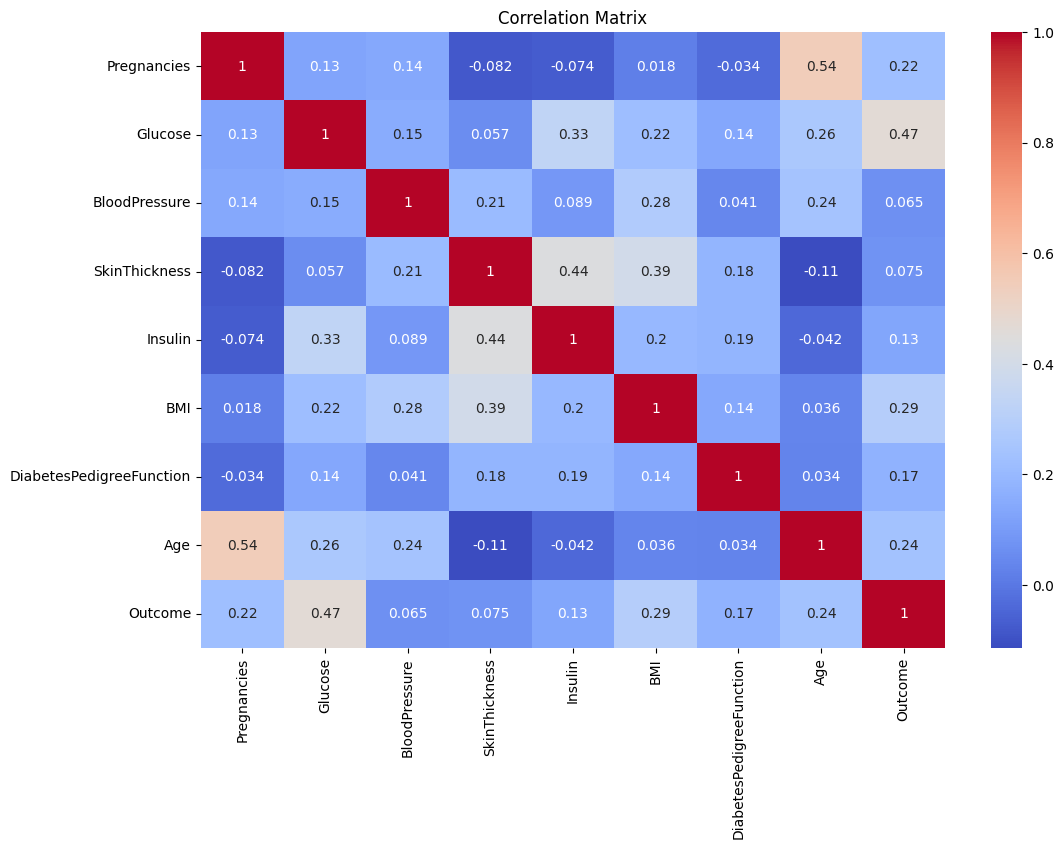

In [8]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

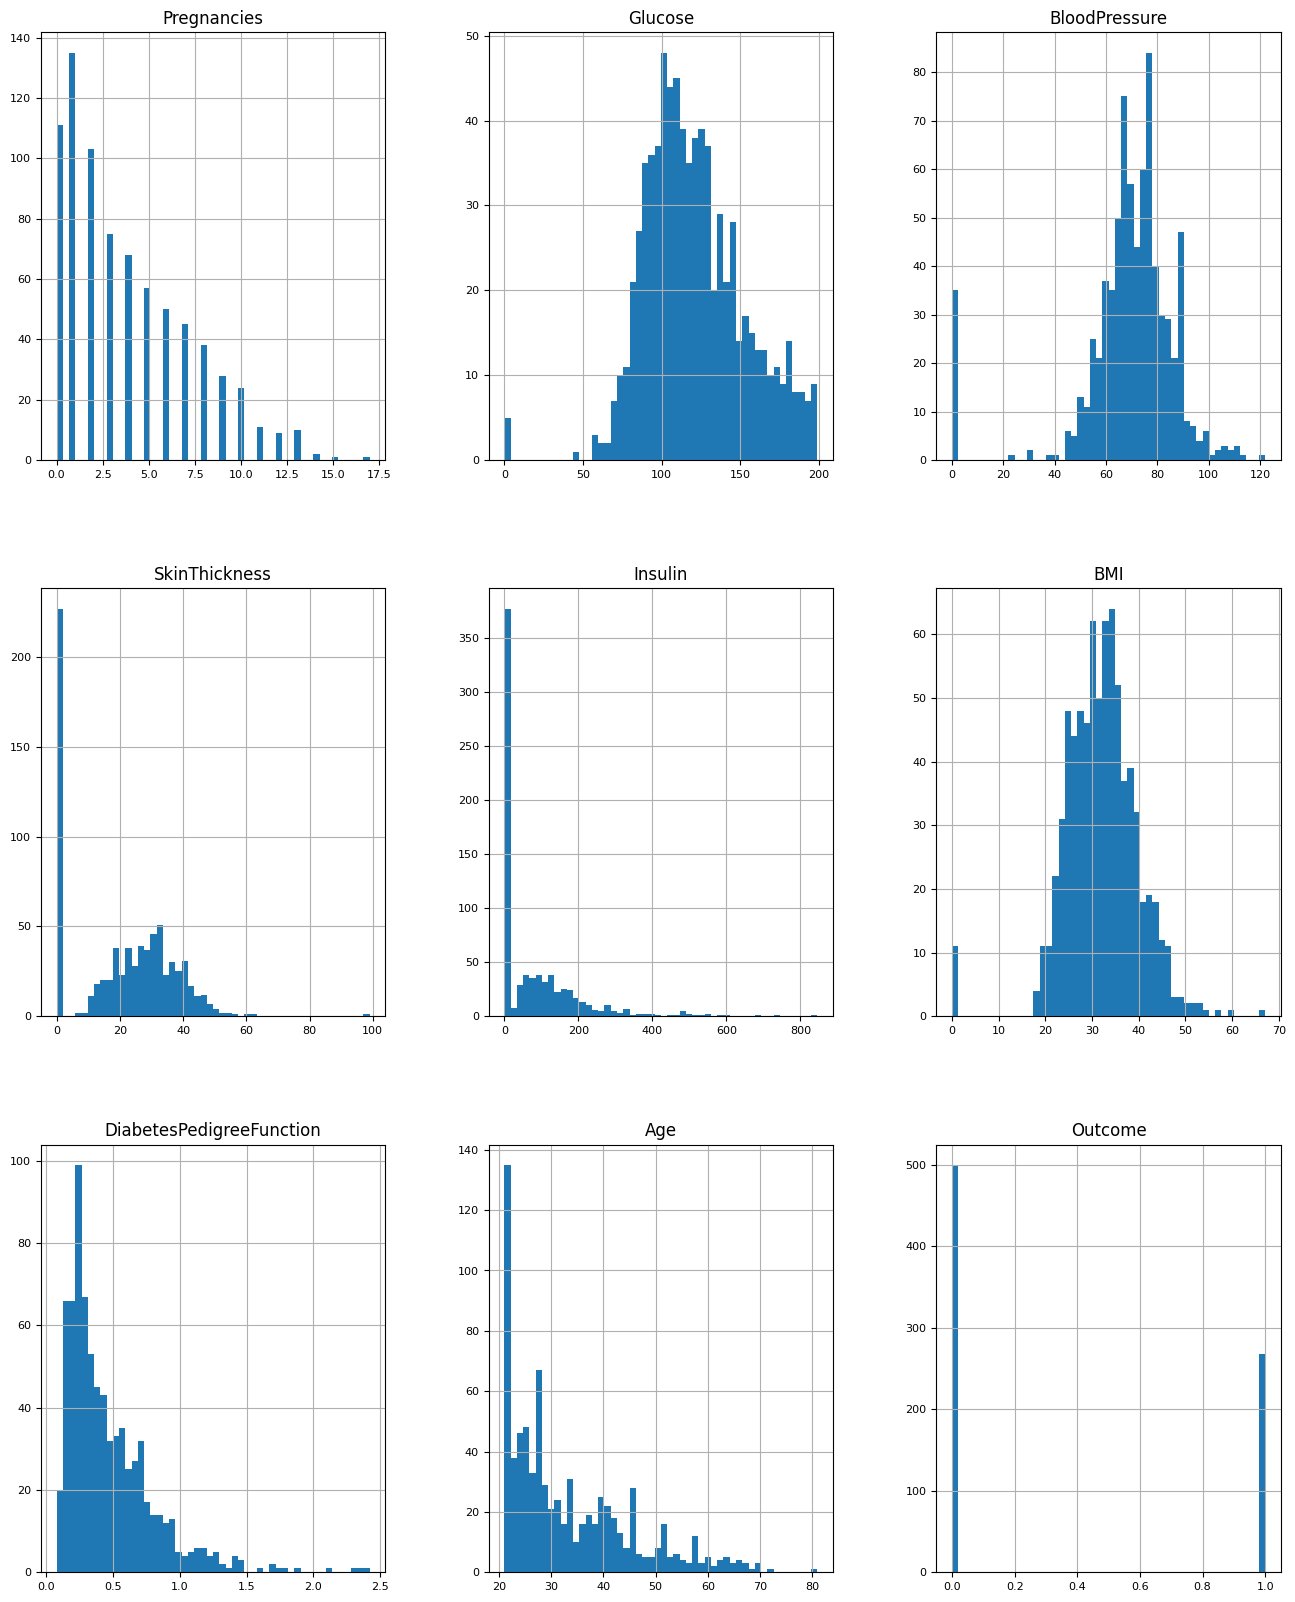

In [9]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [9]:
# df_ = df.copy()
# # df_['DiabetesPedigreeFunction'] = np.log(df['DiabetesPedigreeFunction'])
# df_['SkinThickness'] = df_['SkinThickness'] + 1
# df_['SkinThickness'] = np.log(df['SkinThickness'])
# df_['SkinThickness']

In [10]:
X = df.drop('Outcome', axis=1).to_numpy()  # Input features
y = df['Outcome'].to_numpy()  # Target labels
y = y.reshape(-1,1)

In [12]:
print(X.shape)
print(y.shape)

(768, 8)
(768, 1)


In [13]:
W1 = np.random.randn(X.shape[1],4) * 0.01
b1 = np.zeros((1,4))
W2 = np.random.randn(4,1) * 0.01
b2 = np.zeros((1,1))

In [14]:
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(8, 4)
(1, 4)
(4, 1)
(1, 1)


In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = np.tanh(Z1)
    print(A1.shape)

    Z2 = np.dot(A1,W2) + b2
    A2 = sigmoid(Z2)
    print(A2.shape)

    cache = {
        'Z1':Z1,
        'A1':A1,
        'Z2':Z2,
        'A2':A2
    }
    return cache

In [15]:
cache = forward_propagation(X)

(768, 4)
(768, 1)


In [126]:
def cost(y_pred, y_true):
    
    loss = np.mean(-(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))
    return loss